# Analiza podstrani(subredditov) r/news in r/worldnews spletne strani Reddit

Reddit je ameriška zabavna, družbena in novičarska spletna stran.
Na Reddit uporabniki objavljajo razne povezave (večinoma na druge spletne strani), ki jih lahko drugi uporabniki ocenijo pozitivno (upvote) ali negativno (downvote) in komentirajo. Razdeljena je na več podstrani-subredditov.

Podstrani r/news in r/worldnews sta privzeti. Objave privzetih strani se pokažejo neregistriranim in novim uporabnikom na naslovnici(front page), ker se večina uporabnikov od podstrani ne odjavi, le prijavi, imajo tako privzete strani avtomatsko največ uporabnikov.

Primerjala sem novice dveh takih večjih podstrani r/news-novice in r/worldnews-svetovne novice. Podstrani so razdeljene na več delov, analizirala sem top-najboljše in contraversial-kontraverzno.

## Hipoteze
    - 1. r/news bo imel več ameriških virov novic kot r/worldnews.
    - 2. Viri r/worldnews bodo kvalitetnejše od virov r/news. (The Guardian > FoxNews ) 
    - 3. Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
## Primerjave
    - Primerjava povprečnih ocen in komentarjev vseh kategorji
    - Primerjava povprečnih ocen in komentarjev najpogostejših virov
    - Pregled 5 najbolj komentiranih in  najbolje ocenjenih novic posameznih kategorij

In [275]:
import pandas as pd
%matplotlib inline
pd.set_option('max_colwidth',400)

In [276]:
news_con=pd.read_csv('news_con.csv')
news_top=pd.read_csv('news_top.csv')
wnews_con=pd.read_csv('wnews_con.csv')
wnews_top=pd.read_csv('wnews_top.csv')

In [277]:
news_con_viri=news_con.groupby(['Vir'],as_index=False)
news_top_viri=news_top.groupby(['Vir'],as_index=False)
wnews_con_viri=wnews_con.groupby(['Vir'],as_index=False)
wnews_top_viri=wnews_top.groupby(['Vir'],as_index=False)

### Hipoteza 1: r/news bo imel več ameriških virov novic kot r/worldnews
Že v samem opisu podstrani r/worldnews je zapisano, da stran dovoljuje povezave na vse novice, razen notranjih zadev in politike ZDA. Tako še s preštetjem pojavitve virov potrdimo, da hipoteza drži.

Združila sem skupaj število novic posameznega vira r/news in r/worldnews. Tako sem dobila vpogled v seznam najpogostejših virov na posamezni strani.

In [278]:
viri_news=pd.concat([news_con,news_top]).groupby(by='Vir',as_index=False).count()
viri_wnews=pd.concat([wnews_con,wnews_top]).groupby(by='Vir',as_index=False).count()

In [279]:
viri_news[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)

,Vir,Naslov
454,washingtonpost.com,58
404,theguardian.com,48
154,foxnews.com,25
323,nytimes.com,23
305,news.yahoo.com,22
290,nbcnews.com,21
12,abcnews.go.com,19
86,cnn.com,19
191,independent.co.uk,19
446,usatoday.com,17


In [280]:
viri_wnews[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)

,Vir,Naslov
371,theguardian.com,64
318,rt.com,54
31,bbc.co.uk,36
70,dailymail.co.uk,31
182,independent.co.uk,30
32,bbc.com,29
284,nytimes.com,24
316,reuters.com,21
334,self.worldnews,16
434,washingtonpost.com,15


Komentar: 
(Analiziram samo 10 najpogostejših virov)
V razdelku r/news se pojavi samo 2 neameriška vira (theguardian.com in independent.co.uk).
V razdelku r/worldnews sta tudi samo 2 ameriška vira(nytimes.com, washingtonpost.com) uvrstila med 10 najpogostejših.

Predvidevem lahko, da so bralci in naročniki r/news večinoma prebivalci ZDA, ki jih seveda zanimajo novice povezane z ZDA, bralci r/worldnews pa so ostali obiskovalci Reddita.

Moja hipoteza je potrjena. V r/news je 8 ameriških virov, v r/wnews pa le 2.

###  Hipoteza 2:Viri r/worldnews bodo kvalitetnejše od virov r/news.


S pomočjo prejšnih tabel ugotovimo, da se med najpogostejšimi viri r/news izstopa samo foxnews.com, za katerega bi lahko trdili, da ne poroča najbolj objektivneje.

Med najpogostejšimi viri r/worldnews zasledimo 2, ki bi ju lahko uvrstili med pristranski in rumeni tisk. To sta na drugem mestu po pogostosti ruska spletna stran rt.com in britanski tabloid dailymail.co.uk.

Moja hipoteza ne drži. Viri r/worldnews in r/news so si enakovredni.

### Hipoteza 3 : Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
Sedaj združim vire novic kontraverzno in najboljše.

In [289]:
novice_kontraverzno=pd.concat([wnews_con,news_con])
novice_najboljse=pd.concat([wnews_top,news_top])
novice_kontraverzno_viri=pd.concat([wnews_con,news_con]).groupby(by='Vir',as_index=False).count()
novice_najboljse_viri=pd.concat([wnews_top,news_top]).groupby(by='Vir',as_index=False).count()

In [296]:
naj10_con=novice_kontraverzno_viri[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)
naj10_con

,Vir,Naslov
396,rt.com,50
95,dailymail.co.uk,34
440,theguardian.com,28
168,foxnews.com,22
508,washingtonpost.com,21
43,bbc.co.uk,20
328,news.yahoo.com,18
345,nytimes.com,17
215,independent.co.uk,16
469,timesofisrael.com,15


In [297]:
naj10_top=novice_najboljse_viri[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)
naj10_top

,Vir,Naslov
366,theguardian.com,84
415,washingtonpost.com,52
28,bbc.com,33
173,independent.co.uk,33
284,nytimes.com,30
309,reuters.com,27
27,bbc.co.uk,26
254,nbcnews.com,19
268,news.yahoo.com,18
31,bigstory.ap.org,17


Na vrhu kontraverzno opazimo medij ruske vladne propagande. rt.com (Russia Today) slovi 
kot pristranska (seveda, v korist rusom) in zavajajoča novinarska hiša, znana po širjenju napačnih informacij.
V spodnji tabeli je zapisanih 5 najbolje ocenjenih novic rt.com. Opazimo, da so novice nenaklonjene ZDA (85, 123,433) (ZDA ne marajo Snowdena...) in seveda vzmirjajočo novico za uporabnike spleta (235).

In [292]:
novice_kontraverzno[novice_kontraverzno['Vir'] =='rt.com'].sort_values('Score', ascending=False).head()

,Naslov,Score,Komentarji,Vir
235,UK: Man jailed for 33 months for pirating ‘Fast &amp; Furious’,2396,3245,rt.com
85,The US has been voted as the most significant threat to world peace in a survey across 68 different countries,2233,5979,rt.com
433,"Snowden nominated for Nobel Peace Prize by Swedish professor. ""[H]eroic effort at great personal cost.”",2169,687,rt.com
123,"New video: Edward Snowden receives award from NSA, CIA, FBI and DOJ officials, breaks silence on NSA programs for the first time in Russia. Reveals new details on how mass surveillance makes us less - not more - safe.",1593,575,rt.com
16,Obama considers ending NSA surveillance programs.,1252,1060,rt.com


Na drugo mesto po pogostosti virov kontraverznih novic je britanski rumeni tračarski časopis dailymail.co.uk.
Znani konservativni tabloid je znan po nenatančnem, pristranskem in senzacionalnem poročanju. To potrdi tudi seznam 4 najbolje ocenjenih novic. (Ena je bila na strani objavljena dvakrat). 
Novice so povezane s spolnim nasiljem(61), nasiljem (192,307) in krščanstvom(178). 

In [293]:
novice_kontraverzno[novice_kontraverzno['Vir'] =='dailymail.co.uk'].sort_values('Score', ascending=False).head()

,Naslov,Score,Komentarji,Vir
192,Mobs of 'hundreds' of masked men rampage through Stockholm central station beating up refugee children,3339,6268,dailymail.co.uk
61,Roman Catholic church's paedophile investigator jailed for possessing thousnds of child porn images,772,784,dailymail.co.uk
307,'Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.\r\n,359,149,dailymail.co.uk
184,'Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.\r\n,246,87,dailymail.co.uk
178,Secret £14million Bible in which 'Jesus predicts coming of Prophet Muhammad' unearthed in Turkey,83,151,dailymail.co.uk


V kategoriji najboljše se med desetimi najpogostejšimi viri ne pojavi vir "vprašljive" kakovosti. 
Za primerjavo kakovosti novice, si poglejmo 5 najbolje ocenjenih novic vira guardian.com.

In [295]:
novice_najboljse[novice_najboljse['Vir'] =='theguardian.com'].sort_values('Score', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
5,"ISIS beheads 81-year-old pioneer archaeologist and foremost scholar on ancient Syria. Held captive for 1 month, he refused to tell ISIS the location of the treasures of Palmyra unto death.",10512,1850,theguardian.com
9,France decrees new rooftops must be covered in plants or solar panels. All new buildings in commercial zones across the country must comply with new environmental legislation,9952,4038,theguardian.com
22,The first UN privacy chief has said the world needs a Geneva convention style law for the internet to safeguard data and combat the threat of massive clandestine digital surveillance.,8651,652,theguardian.com
34,John Kerry: Vietnam war was result of 'profound failure of diplomatic insight'.I’m reminded of conversations I’ve had recently with people who talk almost casually about the prospect of war with one country or another. I’m tempted to say: ‘You don’t have the first idea of what you’re talking about’,8053,2412,theguardian.com
35,Google to reorganize into new company called Alphabet,8030,2405,theguardian.com


Viri najboljse ne vsebujejo nobenega vira 'vprašljivega' porekla. 

### Primerjave
Najprej raziščem, kakšna je razlika v komentarjih in ocenah za različne vire v naših kategorijah.
Ker sem ugotovila, da viri se podobni viri pojavijo v skupnih podstraneh(najboljše in kontraverzno) bom primerjala r/news in r/worldnews kontraverzno in r/news in r/worldnews najboljše.

### Primerjave
Najprej primerjam povprečne ocene in povprečno število komentarjev 10 najpogostejših virov (vseh novic). Primerjam kontaverzno in najboljše v posameznem podredditu.

In [375]:
vse_novice=pd.concat([news_con,wnews_con,news_top,wnews_top])
vse_novice_viri=vse_novice.groupby(by='Vir')

In [377]:
news_viri=pd.merge(news_con,news_top,on='Vir', suffixes=('_news_con', '_news_top')).groupby(by='Vir', as_index=False).mean()
#povprecje_scor_news
wnews_viri=pd.merge(wnews_con,wnews_top,on='Vir', suffixes=('_wnews_con', '_wnews_top')).groupby(by='Vir', as_index=False).mean()
vsi_viri=pd.merge(news_viri,wnews_viri,on='Vir').groupby(by='Vir', as_index=False).mean()

In [378]:
vsi_viri

,Vir,Score_news_con,Komentarji_news_con,Score_news_top,Komentarji_news_top,Score_wnews_con,Komentarji_wnews_con,Score_wnews_top,Komentarji_wnews_top
0,bbc.co.uk,3.000000,10.142857,5651.333333,7501.000000,765.076923,1229.615385,6685.000000,4225.391304
1,bbc.com,9.500000,43.500000,6025.600000,3192.400000,2461.000000,3934.000000,6461.321429,3291.821429
2,bigstory.ap.org,4.000000,29.250000,6640.666667,1355.333333,0.000000,7.000000,7097.750000,1965.625000
3,bloomberg.com,0.000000,11.000000,6098.000000,3378.600000,0.000000,83.000000,6198.125000,2402.875000
4,cbc.ca,4.500000,42.500000,5951.333333,2889.000000,2412.000000,4897.000000,6652.111111,3714.222222
5,cnn.com,49.444444,116.222222,6275.900000,5913.000000,783.333333,830.000000,6047.285714,2420.142857
6,economist.com,0.000000,36.000000,5700.000000,2213.000000,14.000000,275.000000,6003.000000,738.000000
7,foxnews.com,19.428571,84.666667,5742.250000,2895.000000,1954.000000,9534.000000,6185.666667,3117.666667
8,guardian.co.uk,16.500000,31.500000,5595.000000,4404.000000,685.250000,753.750000,8866.000000,6151.000000
9,hosted.ap.org,0.500000,39.000000,7612.000000,3740.000000,3.000000,20.000000,5783.000000,1558.000000


#### Kateri vir je najboljši v kateri posamezni kategoriji?

In [360]:
#najpopularnejsi v r/news kontraverzno
news_con_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

,Vir,Score,Komentarji
84,fox26houston.com,4313,5955


In [361]:
#Kakšne novice ima?
news_con[news_con['Vir']=='fox26houston.com']

,Naslov,Score,Komentarji,Vir
467,US Marshals arresting people for not paying their federal student loans,4313,5955,fox26houston.com


In [362]:
#najpopularnejsi v r/news najboljse 
news_top_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

,Vir,Score,Komentarji
131,ktul.com,9709,3607


In [363]:
#Kakšne novice ima?
news_top[news_top['Vir']=='ktul.com']

,Naslov,Score,Komentarji,Vir
1,"Cop stops influential business man for DUI. While on scene he receives a call from local leader to let the man go and the city manager even shows up on scene. The cop refuses and proceeds with the arrest, now the cop and his superior are being threatened with loss of their jobs.",9709,3607,ktul.com


In [364]:
#najpopularnejsi v r/wnews kontraverzno
wnews_con_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

,Vir,Score,Komentarji
233,techinsider.io,3194,989


In [365]:
#Kakšne novice ima?
wnews_con[wnews_con['Vir']=='techinsider.io']

,Naslov,Score,Komentarji,Vir
553,Oslo just declared that it will become the first major city to ban cars,3194,989,techinsider.io


In [366]:
#najpopularnejsi v r/wnews najboljse 
wnews_top_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

,Vir,Score,Komentarji
42,digitaljournal.com,13632.5,2521


In [367]:
#Kakšne novice ima?
wnews_top[wnews_top['Vir']=='digitaljournal.com']

,Naslov,Score,Komentarji,Vir
0,"A biotech startup has managed to 3-D print fake rhino horns that carry the same genetic fingerprint as the actual horn. The company plans to flood Chinese rhino horn market at one-eighth of the price of the original, undercutting the price poachers can get and forcing them out eventually.",21250,3876,digitaljournal.com
343,Indonesia is planning to build a prison island guarded by meat-hungry crocodiles for drug convicts. The reason for using the deadly reptiles as prison guards is that crocodiles cannot be bribed unlike human guards.,6015,1166,digitaljournal.com


Kateri pa je najbolj popularen vir vseh novic?

In [368]:
vse_novice_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

,Score,Komentarji
Vir,,
sydneycriminallawyers.com.au,12334,1978


In [369]:
#Zakaj? Poglejmo si novice tega vira.
vse_novice[vse_novice['Vir'] =='sydneycriminallawyers.com.au'].sort_values('Score', ascending=False).head()

,Naslov,Score,Komentarji,Vir
2,"The police officer who leaked the footage of the surfers paradise police brutality, where the victims blood was washed away by officers, has been criminally charged for bringing it to the publics view. Officers who did the bashing get nothing.",12334,1978,sydneycriminallawyers.com.au


Vsak najbolje ocenjen vir (iz posamezne kategorije in nasplošno) ima po eno novico (razen digitaljournal.com, ki ima 2). Pojavitev ene same novice enostavno pojasnii visoko povprečje novice, saj nobena slabše ocenjena novica ne pokvari povprečja kot pri virih z več novicami.

#### Kateri vir najbolj odstopa?

In [379]:
povprecje_kategorij=vsi_viri.mean()
seznam_kategorij=list (povprecje_kategorij.reset_index()['index'])

In [380]:
#relativne ocene in komentarji posameznega vira za vsako kategorijo
for i in seznam_kategorij:
    vsi_viri['{0}'.format(i)] = vsi_viri['{0}'.format(i)]/(vsi_viri.mean()['{0}'.format(i)])

In [381]:
#seštejem razlike
vsi_viri['rel']=sum([vsi_viri['{0}'.format(i)] for i in seznam_kategorij])/len(seznam_kategorij)

In [382]:
povprecje_kategorij

Score_news_con           192.124173
Komentarji_news_con      211.512211
Score_news_top          6043.907964
Komentarji_news_top     3372.475076
Score_wnews_con          545.898807
Komentarji_wnews_con    1087.222632
Score_wnews_top         6521.872191
Komentarji_wnews_top    2947.567280
dtype: float64

In [387]:
#poglejmo si 5 virov z največjo razliko
vsi_viri[['Vir','rel']].sort_values(by='rel',ascending=False).head()

,Vir,rel
7,foxnews.com,2.083079
10,independent.co.uk,1.780907
16,nytimes.com,1.734095
21,time.com,1.672553
4,cbc.ca,1.658536


Oglejmo si podatke vira foxnews.com 

In [389]:
vsi_viri[vsi_viri['Vir']=='foxnews.com']

,Vir,Score_news_con,Komentarji_news_con,Score_news_top,Komentarji_news_top,Score_wnews_con,Komentarji_wnews_con,Score_wnews_top,Komentarji_wnews_top,rel
7,foxnews.com,0.101125,0.400292,0.950089,0.85842,3.579418,8.769133,0.94845,1.057708,2.083079


In [385]:
vsi_viri[vsi_viri['Vir']=='nj.com']

,Vir,Score_news_con,Komentarji_news_con,Score_news_top,Komentarji_news_top,Score_wnews_con,Komentarji_wnews_con,Score_wnews_top,Komentarji_wnews_top,rel


In [386]:
vsi_viri[vsi_viri['Vir']=='money.cnn.com']

,Vir,Score_news_con,Komentarji_news_con,Score_news_top,Komentarji_news_top,Score_wnews_con,Komentarji_wnews_con,Score_wnews_top,Komentarji_wnews_top,rel


In [247]:
#poglejmo si 5 virov z najmanjšo razliko
vsi_viri[['Vir','rel']].sort_values(by='rel').head()

,Vir,rel
46,nbcnewyork.com,0.310279
50,newscientist.com,0.317963
68,thesource.com,0.347984
20,digitaljournal.com,0.375458
47,nbcwashington.com,0.383512


Kateri vir ima najboljše povprečje ocen?

In [248]:
vse_novice.groupby(['Vir']).mean().sort_values('Score',ascending=False).head(n=1)

,Score,Komentarji
Vir,,
sydneycriminallawyers.com.au,12334,1978


In [390]:
#Zakaj? Poglejmo si novice tega vira.
vse_novice[vse_novice['Vir'] =='sydneycriminallawyers.com.au'].sort_values('Score', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
2,"The police officer who leaked the footage of the surfers paradise police brutality, where the victims blood was washed away by officers, has been criminally charged for bringing it to the publics view. Officers who did the bashing get nothing.",12334,1978,sydneycriminallawyers.com.au


Ugotovimo, da ima samo eno novico. Nima ostalih novic, ki bi znižale povprečje. 

Kateri vir je najbolj komentiran?

In [391]:
vse_novice.groupby(['Vir']).mean().sort_values('Komentarji',ascending=False).head(n=1)

,Score,Komentarji
Vir,,
ktla.com,5823.5,27226


In [392]:
#KTLA je vir iz Los Angelesa. Poglejmo si novice tega vira.

In [393]:
vse_novice[vse_novice['Vir'] =='ktla.com'].sort_values('Score', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
198,Authorities Respond to “20 Victim Shooting” Incident in San Bernardino: Fire Dept.,6076,48770,ktla.com
392,9 Arrested After Black Lives Matter Activists Shut Down Southbound 405 Fwy Near LAX,5571,5682,ktla.com


###Primerjava povprečnih ocen in komentarjev najpogostejših virov, ki se pojavijo v vseh kategorijah

In [394]:
#združimo po skupinah najboljše in kontraverzno po virih
kontraverznoV=vsi_viri[['Vir','Score_news_con','Komentarji_news_con','Score_wnews_con','Komentarji_wnews_con','rel']]
najboljseV=vsi_viri[['Vir','Score_news_top','Komentarji_news_top','Score_wnews_top','Komentarji_wnews_top','rel']]
sez_naj10_con=list (naj10_con['Vir'])
sez_naj10_top=list (naj10_top['Vir'])

In [396]:
Kontraverzno_pogosti=kontraverznoV[(kontraverznoV['Vir']==sez_naj10_con[0])|
              (kontraverznoV['Vir']==sez_naj10_con[1])|
              (kontraverznoV['Vir']==sez_naj10_con[2])|
              (kontraverznoV['Vir']==sez_naj10_con[3])|
              (kontraverznoV['Vir']==sez_naj10_con[4])|
              (kontraverznoV['Vir']==sez_naj10_con[5])|
              (kontraverznoV['Vir']==sez_naj10_con[6])|
              (kontraverznoV['Vir']==sez_naj10_con[7])|
              (kontraverznoV['Vir']==sez_naj10_con[8])|
              (kontraverznoV['Vir']==sez_naj10_con[9])
             ]
Kontraverzno_pogosti

,Vir,Score_news_con,Komentarji_news_con,Score_wnews_con,Komentarji_wnews_con,rel
0,bbc.co.uk,0.015615,0.047954,1.401500,1.130969,1.026725
7,foxnews.com,0.101125,0.400292,3.579418,8.769133,2.083079
10,independent.co.uk,2.210376,5.560357,1.594160,0.883904,1.780907
14,news.yahoo.com,0.125353,0.234423,0.184405,0.260603,0.531902
16,nytimes.com,6.075498,3.113295,0.362908,0.077363,1.734095
20,theguardian.com,1.906319,1.176942,1.467458,0.422790,1.073997
23,washingtonpost.com,2.360453,4.916501,0.000000,0.022075,1.375245


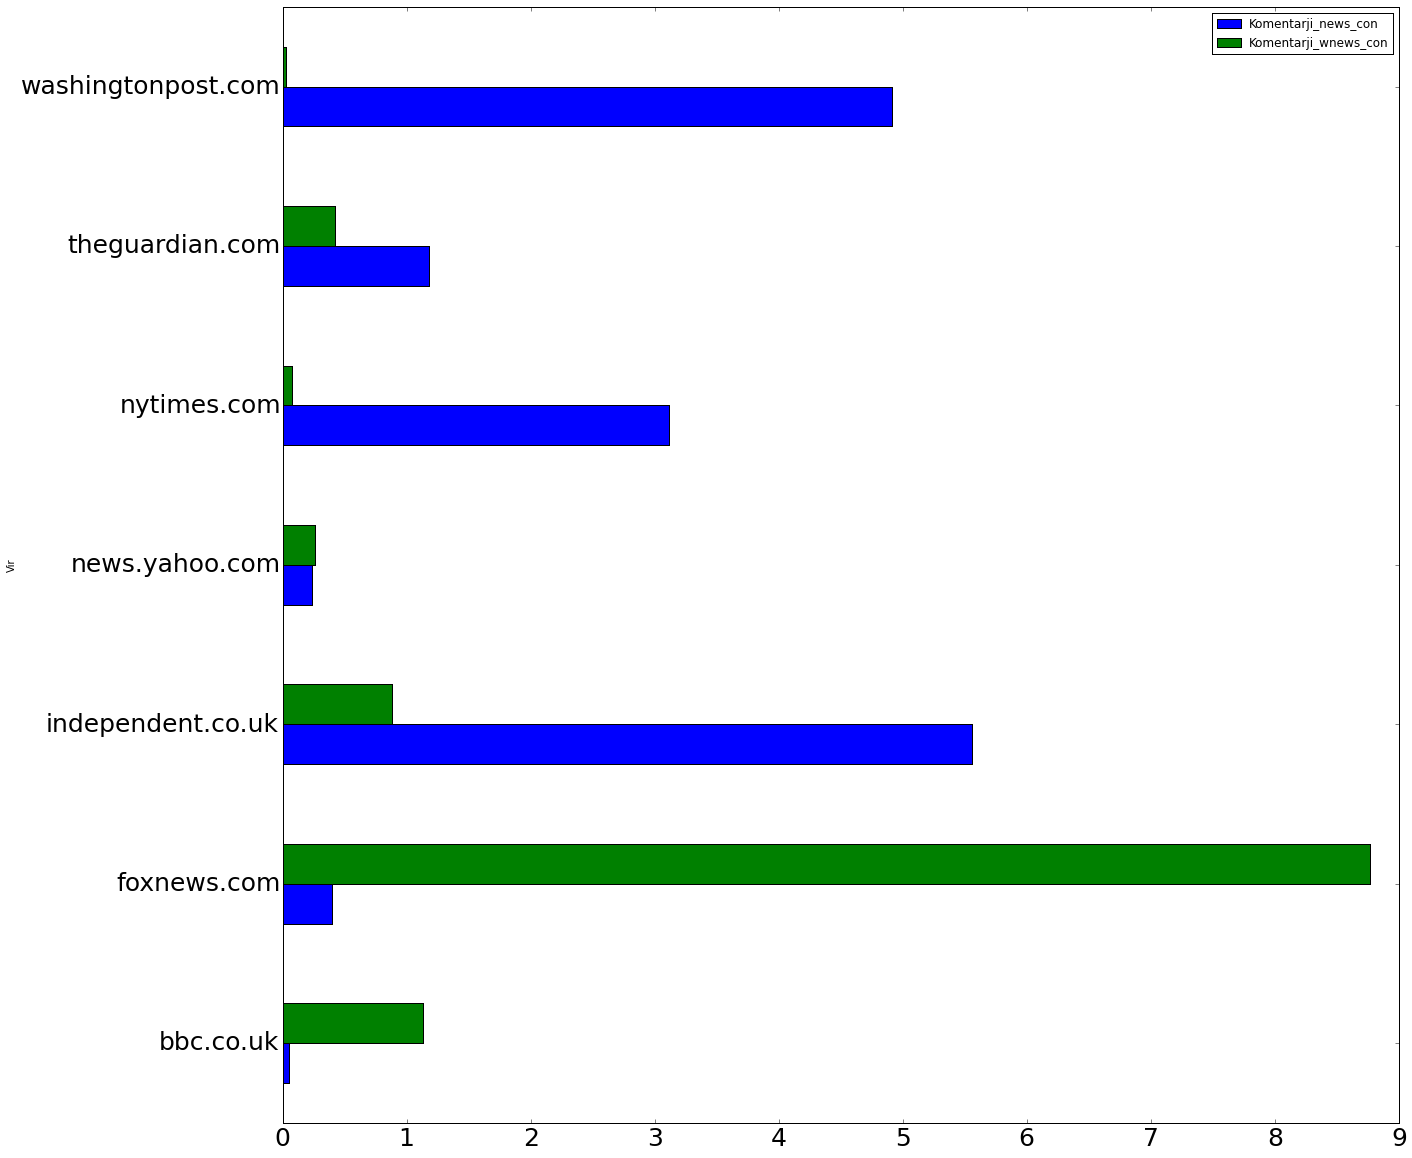

In [397]:
#primerjava komentarjev
Kontraverzno_pogosti[['Vir','Komentarji_news_con','Komentarji_wnews_con']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

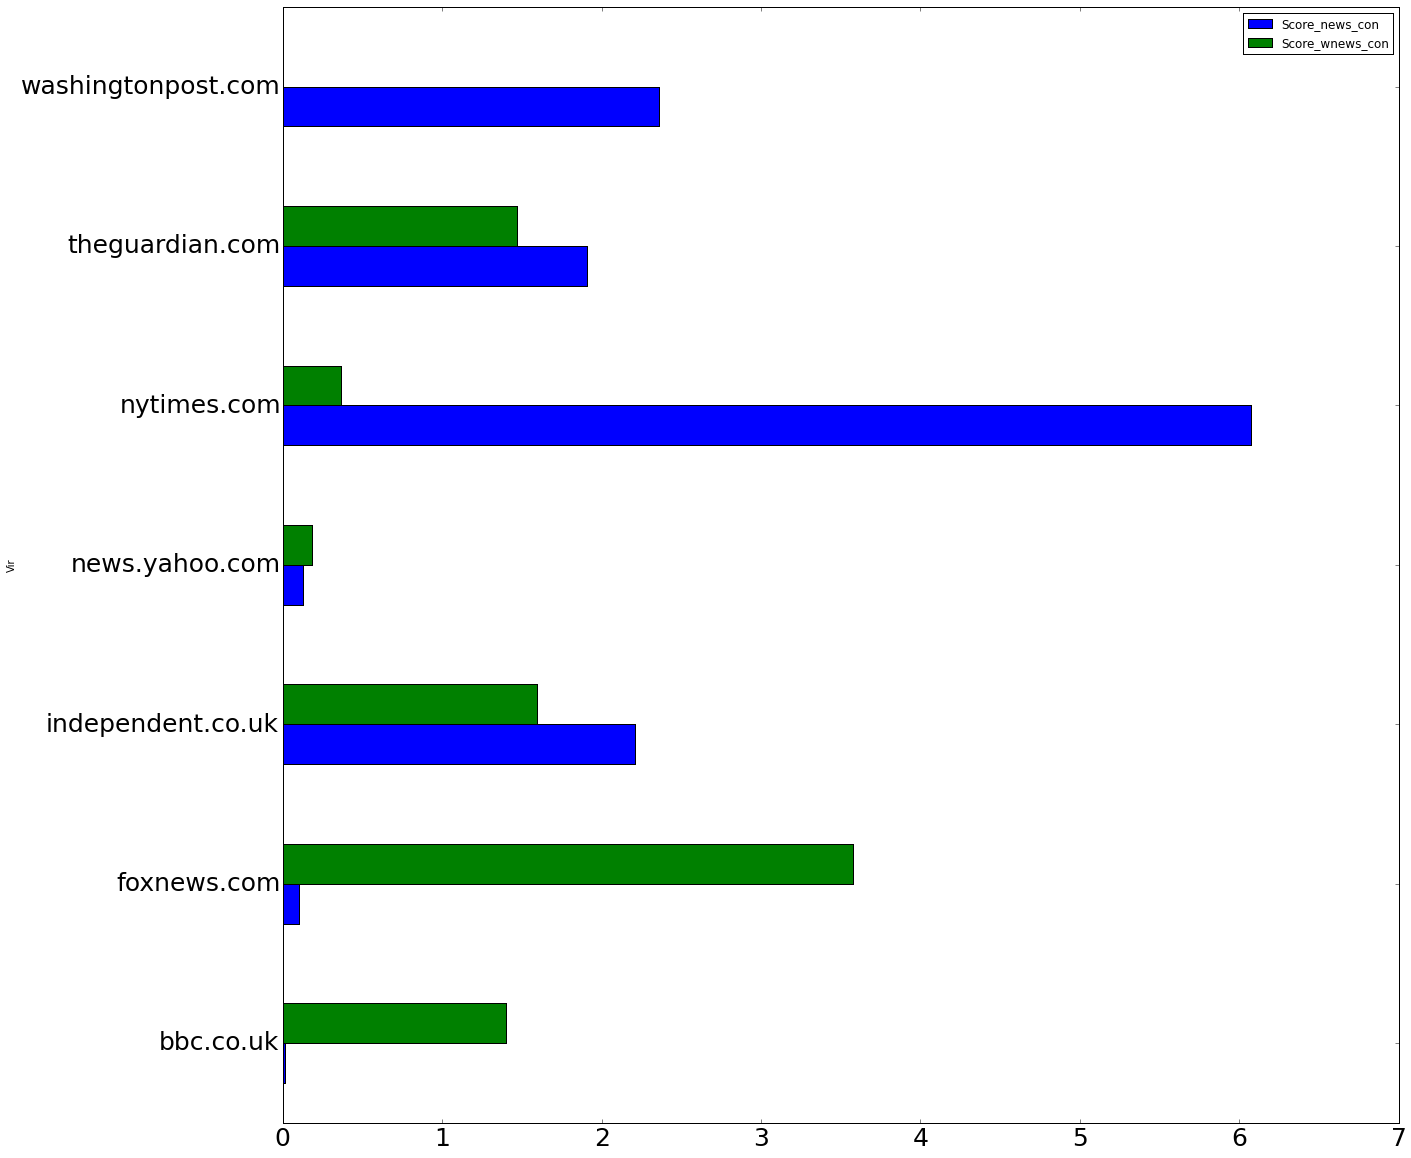

In [402]:
#primerjava ocen kontraverzno
Kontraverzno_pogosti[['Vir','Score_news_con','Score_wnews_con']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

In [399]:
Najboljse_pogosti=najboljseV[(najboljseV['Vir']==sez_naj10_top[0])|
              (najboljseV['Vir']==sez_naj10_top[1])|
              (najboljseV['Vir']==sez_naj10_top[2])|
              (najboljseV['Vir']==sez_naj10_top[3])|
              (najboljseV['Vir']==sez_naj10_top[4])|
              (najboljseV['Vir']==sez_naj10_top[5])|
              (najboljseV['Vir']==sez_naj10_top[6])|
              (najboljseV['Vir']==sez_naj10_top[7])|
              (najboljseV['Vir']==sez_naj10_top[8])|
              (najboljseV['Vir']==sez_naj10_top[9])]
Najboljse_pogosti

,Vir,Score_news_top,Komentarji_news_top,Score_wnews_top,Komentarji_wnews_top,rel
0,bbc.co.uk,0.935046,2.224182,1.025012,1.433518,1.026725
1,bbc.com,0.996971,0.946604,0.990716,1.116793,1.554094
2,bigstory.ap.org,1.098737,0.401881,1.088299,0.666863,0.427666
10,independent.co.uk,0.966310,1.071659,1.004213,0.956278,1.780907
12,nbcnews.com,0.930017,1.007902,0.977327,1.371640,1.428020
14,news.yahoo.com,0.964492,0.613111,0.933283,0.939546,0.531902
16,nytimes.com,0.987341,1.158635,0.939004,1.158718,1.734095
17,reuters.com,0.944527,0.659753,0.957691,1.239751,0.942298
20,theguardian.com,0.976779,0.704629,1.010001,0.927055,1.073997
23,washingtonpost.com,1.032114,0.786202,0.958796,0.925824,1.375245


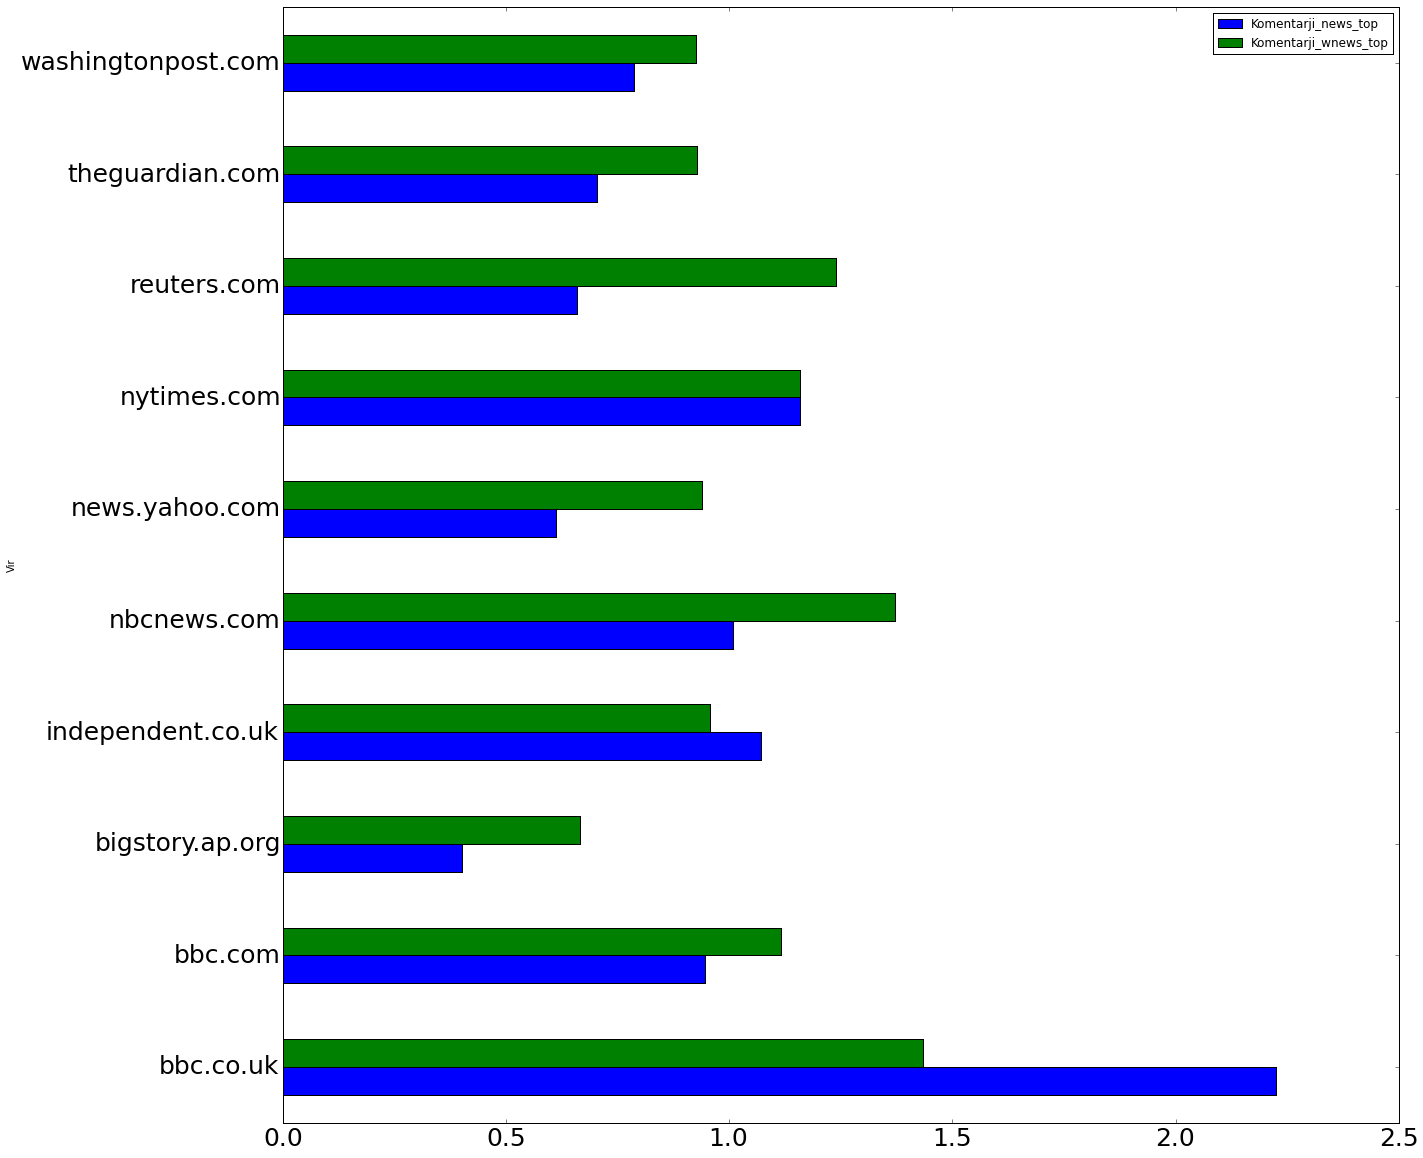

In [401]:
#primerjava komentarjev najboljse
Najboljse_pogosti[['Vir','Komentarji_news_top','Komentarji_wnews_top']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

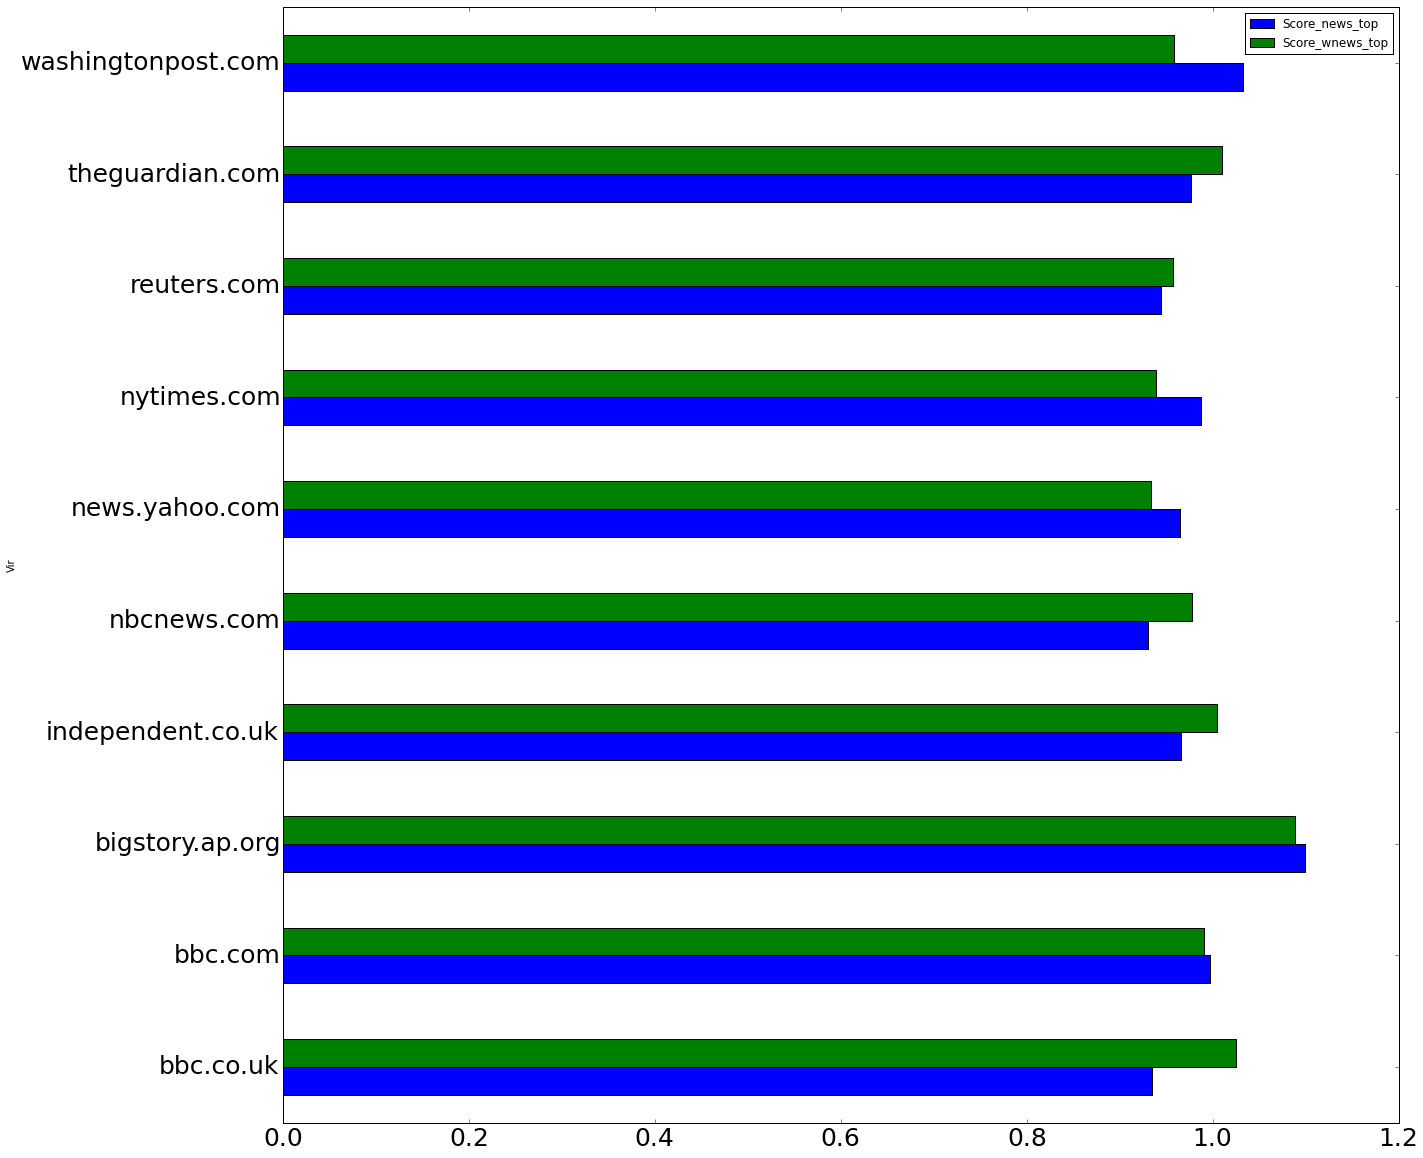

In [404]:
#primerjava ocen najboljse
Najboljse_pogosti[['Vir','Score_news_top','Score_wnews_top']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

In [30]:
news_con[(news_con['Score']>3000)&(news_con['Komentarji']>3000)].sort_values(by='Score',ascending=False)

,Naslov,Score,Komentarji,Vir
338,Supreme Court legalizes gay marriage,5170,17086,washingtonpost.com
353,"[CNN Money] Ellen Pao resignation petition reaches 150,000 signatures",4604,4511,money.cnn.com
467,US Marshals arresting people for not paying their federal student loans,4313,5955,fox26houston.com
377,Danish teen fought off her attacker - now she'll face fine. A 17-year-old girl who was physically and sexually attacked in Sønderborg will herself face charges for using pepper spray to fend off her assailant.,4138,10511,thelocal.dk
156,Ahmed Mohamed demands $15m compensation and written apology for homemade clock arrest,3711,10919,independent.co.uk
448,"50,000 people sign petition to stop Kanye West from playing Pan Am Games closing ceremony",3569,3210,nme.com
225,"The family of 24-year-old Jessica Ghawi, a victim in the 2012 movie theater shooting in Aurora, Colorado, is faced with more than $200,000 in legal costs after a federal judge ordered them to pay attorney’s fees for four ammunition dealers the family attempted to sue.",3307,4782,nbcbayarea.com
240,"The Powerball winning numbers are in. The numbers are: 8, 27, 34, 4, 19; The Powerball is: 10",3306,4227,nj.com


In [31]:
wnews_con[(wnews_con['Score']>2300)&(wnews_con['Komentarji']>2300)].sort_values(by='Score',ascending=False)

,Naslov,Score,Komentarji,Vir
380,"Mercedes-Benz, Honda, Mazda and Mitsubishi have been found to be part of the diesel emission scandal.",4081,2417,theguardian.com
125,Microsoft co-founder's yacht tears up protected coral reef in Cayman Islands. Paul Allen’s 330ft vessel destroys 80% of reef in protected zone,3610,2398,theguardian.com
192,Mobs of 'hundreds' of masked men rampage through Stockholm central station beating up refugee children,3339,6268,dailymail.co.uk
224,"One in three Germans say capitalism to blame for poverty, hunger | The survey found that more than 60 percent of Germans believe there is no genuine democracy in their country because industry has too much political influence and that the voice of the voters plays only a subordinate role.",2925,2453,reuters.com
40,Forty percent of Germans want Merkel to resign over refugee policy,2535,3187,reuters.com
94,Germany 1 - 0 Argentina. Germany win the 2014 FIFA World Cup!,2461,3934,bbc.com
326,"62% of British public says Israel committing war crimes, as polls show sympathy for Palestinians",2450,2918,middleeastmonitor.com
454,"Taxing the rich is good for the economy, IMF says - Business",2412,4897,cbc.ca
438,"Denmark may soon be the first country in the world to issue a ban on non-therapeutic circumcision of boys. Calls it ""Genital Mutilation"". Meanwhile, Israel tries hard to block changes that are broadly perceived in Europe as a clear step forward in children's human rights.",2410,10659,cphpost.dk
235,UK: Man jailed for 33 months for pirating ‘Fast &amp; Furious’,2396,3245,rt.com


In [32]:
news_top[(news_top['Score']>6500)&(news_top['Komentarji']>6500)].sort_values(by='Score',ascending=False)

,Naslov,Score,Komentarji,Vir
31,"FCC approves net neutrality rules, reclassifies broadband as a utility",7372,7223,engadget.com
34,Senior Associate Justice Antonin Scalia found dead at West Texas ranch,7292,13895,mysanantonio.com
53,9-Year-Old Shot Dead in Ferguson While Sitting in Bed Doing Her Homework,7042,8671,people.com
75,Reporter &amp; Crew shot on live tv. WDBJ7. Video in comments.,6780,23868,wdbj7.com


In [33]:
wnews_top[(wnews_top['Score']>6500)&(wnews_top['Komentarji']>6500)].sort_values(by='Score',ascending=False)

,Naslov,Score,Komentarji,Vir
10,'Shootings' reported in central Paris: Reports of shooting and casualties in central Paris,9855,28667,bbc.co.uk
31,"The United States will normalize diplomatic relations with Cuba, open embassy in Havana",8191,7306,thedailybeast.com
47,"Reports of sexual assaults on women across European cities, including Cologne, Hamburg, Zürich, Salzburg, Helsinki during NYE festivities",7834,15149,self.worldnews
71,China declares war on ISIS after terrorists 'execute Chinese hostage',7429,7043,mirror.co.uk
76,"Vaping is 95% safer than smoking and could lead to the demise of the traditional cigarette, Public Health England (PHE) has said in the first official recognition that e-cigarettes are less damaging to health than smoking tobacco.",7360,6822,theguardian.com
123,A group of US Marines foiled a potential terror attack on a French train,6910,6587,uk.businessinsider.com
151,Canadians elect Liberal majority. Ending Stephen Harpers 9 year rule.,6694,11058,cbc.ca
178,Bill aiming to ban child marriages shot down in Pakistan as ‘anti-Islamic’ and ‘blasphemous’.,6533,6579,tribune.com.pk
